In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

In [2]:
from scipy.optimize import fsolve

In [3]:
def center_of_mass(a,b):
    """Функция для нахождения координат центра масс.
 
    """
        
    return ((a-1)*0.5, (b-1)*0.5) 

def square_radius_of_gyration(conformation):
    """Функция возвращает радиус вращения для данной конформации """
    cent_mass=center_of_mass(conformation[0], conformation[1])
    summa=0
    A = 0
    BC = 0
    D = 0
    #print(cent_mass)
    for i in range(conformation[0]):
        for j in range(conformation[1]):
            dist = (i-cent_mass[0],  j-cent_mass[1])
            #print(dist)
            summa=summa+dist[0]*dist[0]+dist[1]*dist[1]
            A+=dist[0]*dist[0]
            D+=dist[1]*dist[1]
            BC+=dist[0]*dist[1]
        
    A/=len(conformation)
    D/=len(conformation)
    BC/=len(conformation)
    equ = lambda x: x*x-(A+D)*x+(A*D-BC*BC)
    
    #lambda1 = fsolve(equ, 10)[0]
    #lambda2 = fsolve(equ, 0)[0]
    
    Di = (A+D)*(A+D)-4*(A*D - BC*BC)
    
    lambda1 = ((A+D) + np.sqrt(Di))*0.5
    lambda2 = ((A+D) - np.sqrt(Di))*0.5;
    
    aratio = (lambda1-lambda2)**2/(lambda1+lambda2)**2
    #print(A, D, BC)
    #print(A+D, summa/len(conformation)  )
    #print(lambda1, lambda2, aratio)
    
    return summa/len(conformation),lambda1,lambda2,aratio

In [4]:
def AspherR(r):
    sq_r=pow(r,2)
    return pow((1-sq_r)/(1+sq_r),2)

In [5]:
sides = np.array([[500,500], [400,500], [300, 500], [250, 500], [200,500], [150,500], [100,500],[50,500], [1,500] ])

In [7]:
ratios = []

aspherical_results = []
aspherical_results2 = []


for pairs in sides:
    
    r,lambda1,lambda2,aratio = square_radius_of_gyration(pairs)
    
    ratios.append(pairs[0]/pairs[1])
    A2 = AspherR(pairs[0]/pairs[1])
    aspherical_results2.append(A2)
    
    aspherical_results.append(aratio)

In [8]:
ratios

[1.0, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.002]

In [9]:
aspherical_results

[0.0,
 0.04818607391414917,
 0.2214558925530108,
 0.3600046080442372,
 0.524382976006595,
 0.6970054336589131,
 0.852084114853123,
 0.9608033786110254,
 1.0]

In [10]:
aspherical_results2

[0.0,
 0.048185603807257546,
 0.22145328719723187,
 0.36,
 0.5243757431629011,
 0.6969952024240383,
 0.8520710059171597,
 0.9607881580237231,
 0.9999840001279994]

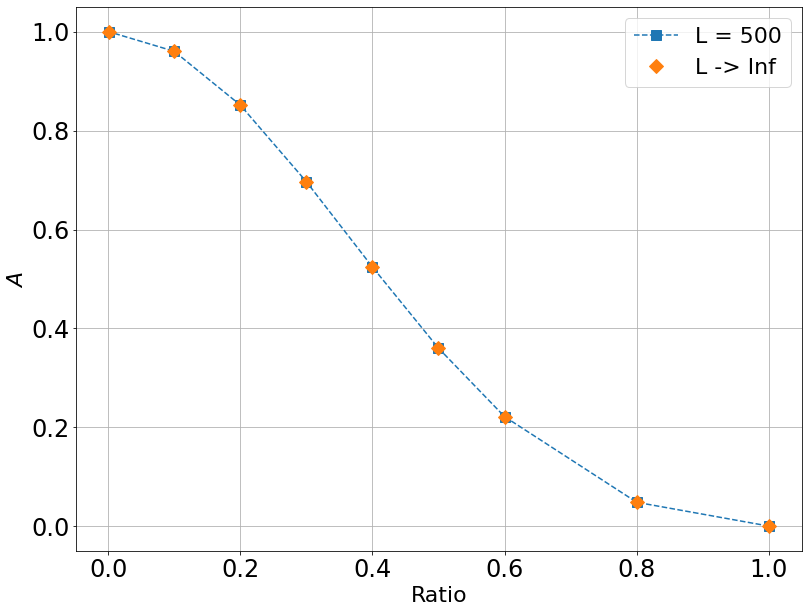

In [20]:
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
plt.plot(ratios, aspherical_results, "s--", ms = 10, label="L = 500" )
plt.plot(ratios, aspherical_results2, "D", ms = 10, label="L -> Inf" )
  
plt.xlabel(r'Ratio', fontsize = 22)
plt.ylabel(r"$ A $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 

#plt.xlim(0.83, 0.835)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

plt.grid()
plt.savefig("A_r.png")